
<h2>Topic: Marketing Campaigns of a Portuguese Banking Institution</h2></center>
    

In [1]:
# Importing Libraries required to perform data analysis on the dataset bank.csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
%matplotlib inline

In [2]:
# Call functions in Capstone_Group4_Utility.py
from Capstone_Group4_Utility import upper_outlier_percentage, create_pie, table_of_target_var, cat_to_dummy, cat_to_one_hot
from Capstone_Group4_Utility import delete_upper_outliers, ROC_curve, plot_top5_feature_importances

<center><h1>Exploratory Data Analysis</h1></center>
<h2><u>Data Dictionary</u></h2>
<p>
<ul>
<h3>Bank Client Data:</h3><br>
<li>age (numeric)</li>
<li>job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')</li>
<li>marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)</li>
<li>education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')</li>
<li>default: has credit in default? (categorical: 'no','yes','unknown')</li>
<li>housing: has housing loan? (categorical: 'no','yes','unknown')</li>
<li>loan: has personal loan? (categorical: 'no','yes','unknown')</li>

<h3>Related with the last contact of the current campaign:</h3><br>

<li>contact: contact communication type (categorical: 'cellular','telephone')</li>
<li>month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')</li>
<li>day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')</li>
<li>duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.</li>

<h3>Other attributes</h3><br>

<li>campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)</li>
<li>pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)</li>
<li>previous: number of contacts performed before this campaign and for this client (numeric)</li>
<li>poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')</li>

<h3>Social and economic context attributes</h3><br>

<li>emp.var.rate: employment variation rate - quarterly indicator (numeric)
<li>cons.price.idx: consumer price index - monthly indicator (numeric)</li>
<li>cons.conf.idx: consumer confidence index - monthly indicator (numeric)</li>
<li>euribor3m: euribor 3 month rate - daily indicator (numeric)</li>
<li>nr.employed: number of employees - quarterly indicator (numeric)</li>

<h3>Output variable (desired target):</h3><br>
    
<li>y - has the client subscribed a term deposit? (binary: 'yes','no')</li>
</ul>
</p>

### 1. Variable Identification
<strong>Business Question:</strong><br /> 
1. Which attributes are significant when predicting whether the customer has subscribed to a term deposit.
2. Can we correctly predict the campaign outcome. <br />

In [3]:
# Reading the Dataset and using sep function to display the dataset in a clear format
df = pd.read_csv('https://query.data.world/s/ltwy4ot54gw6miz7zcx7czarfyhwli', sep=';')

# Using head function to show limited values of the dataset
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
# Examine the variables, data types, number of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
# This is to check whether there are any null values in the data set
df.isnull().values.any()

# Summation of missing values in the data set
df.isnull().sum().sum()

# Since the Output is False we can say that the data set is clean and is ready for analysis
# If there were any Null, missing, NA values then To deal with those values we will replace it with:
# 1: Mean 
# 2: Frequency
# 3: Based on other functions
print(df.dtypes)

# Describing the numerical and categorical columns 
df.describe()

# Defining correlation
# Correlation - It is a statistical summary of the relationship between variables 
df.corr()

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


In [6]:
# Defining correlation for particular columns
df[['age', 'emp.var.rate', 'pdays']].corr()

,age,emp.var.rate,pdays
age,1.000000,-0.000371,-0.034369
emp.var.rate,-0.000371,1.000000,0.271004
pdays,-0.034369,0.271004,1.000000


Here we created a correlation table for age, emp.var.rate and pdays variables from the datasets. We observed that emp.var.rate is weakly positively correlated with pdays.

In [7]:
df[['campaign', 'cons.price.idx', 'nr.employed']].corr()

,campaign,cons.price.idx,nr.employed
campaign,1.000000,0.127836,0.144095
cons.price.idx,0.127836,1.000000,0.522034
nr.employed,0.144095,0.522034,1.000000


Here we created a correlation table for campaign, cons.price.idx and nr.employed variables from the datasets. We observed that all 3 variables are weakly positively related to each other

In [8]:
df[['euribor3m', 'age', 'duration']].corr()

,euribor3m,age,duration
euribor3m,1.000000,0.010767,-0.032897
age,0.010767,1.000000,-0.000866
duration,-0.032897,-0.000866,1.000000


Here we created a correlation table for euribor3m, age and duration. We observed that there's only one positive relation i.e. between euribor3m and age. Other variables have a negative correlation

### 2. Univariate Analysis
<strong>Target variable:</strong> the 21st column. <br />
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

Text(0.5, 1.0, 'Pie Chart of y')

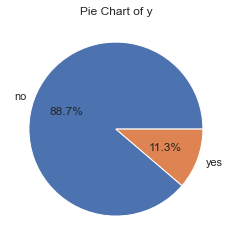

In [9]:
# Categorical variable: y
sns.set(style="darkgrid")
create_pie(df, "y")
plt.title("Pie Chart of y")

From the pie chart, we can tell that the success rate of the marketing campaign is around 11%.

<strong>Bank Client Data:</strong>

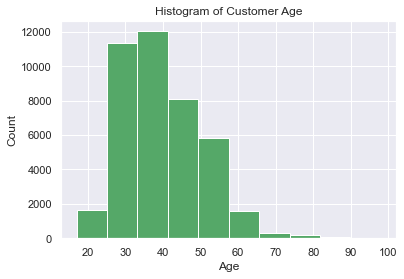

,age
count,41188.00000
mean,40.02406
std,10.42125
min,17.00000
25%,32.00000
50%,38.00000
75%,47.00000
max,98.00000


In [10]:
# Numerical variable: age
plt.hist(df['age'], bins=10, color="g")
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Histogram of Customer Age")
plt.show()
df[['age']].describe()

From the histogram and statistical detail above, we can tell that the distribution of customer age is right-skewed, range from 17 to 98.
Also, the boxplot below showed outliers of "age", accounting for 1.14% of the dataset. Thus, we decided to delete those outliers data directly.

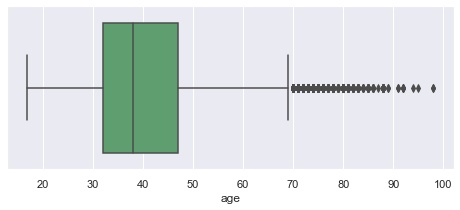

age has 1.14% outliers.


In [11]:
plt.figure(figsize=(8, 3))
sns.boxplot(x=df["age"], color='g')
plt.show()
     
# Age outliers
upper_outlier_percentage(df, "age")

Text(0.5, 1.0, 'Bar Chart of Customer Job')

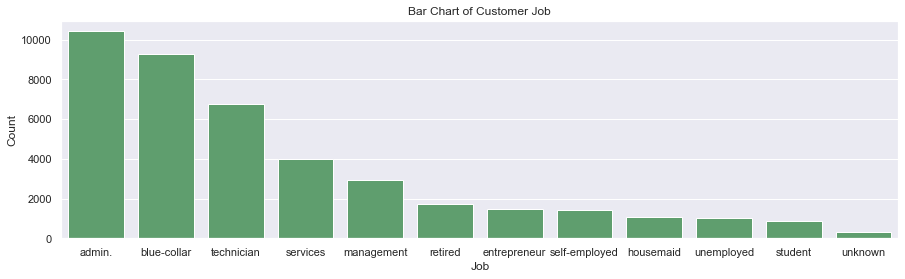

In [12]:
# Categorical variable: job
plt.figure(figsize=(15, 4))
sns.countplot(x="job", data=df, color="g", order = df['job'].value_counts().index)
plt.xlabel("Job")
plt.ylabel("Count")
plt.title('Bar Chart of Customer Job')

From the bar chart above, we can tell that there are 12 types of "job". "admin" accounted for the largest part, followed by "blue-collar", "technician", and "services".

Text(0.5, 1.0, 'Bar Chart of Customer Marital Status')

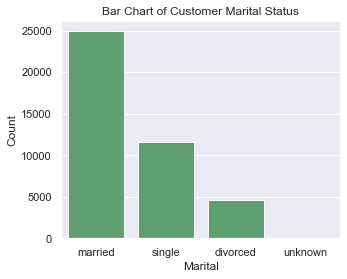

In [13]:
# Categorical variable: marital
plt.figure(figsize=(5, 4))
sns.countplot(x="marital", data=df, color="g", order = df['marital'].value_counts().index)
plt.xlabel("Marital")
plt.ylabel("Count")
plt.title('Bar Chart of Customer Marital Status')

From the bar chart above, we can tell that there are 4 types of "marital". More than half of the clients are married.

Text(0.5, 1.0, 'Bar Chart of Customer Education')

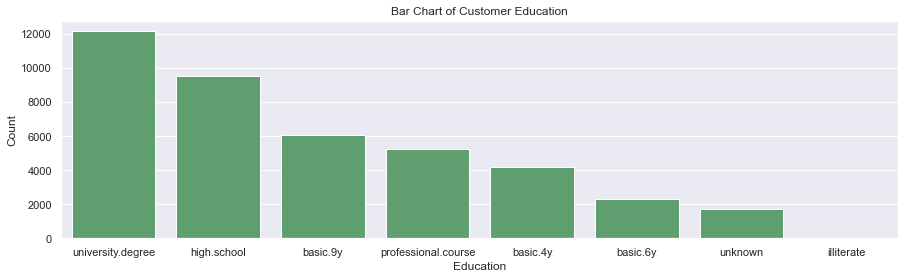

In [14]:
# Categorical variables: education
plt.figure(figsize=(15, 4)) 
sns.countplot(x="education", data=df, color="g", order = df['education'].value_counts().index).set(ylabel=None)
plt.xlabel("Education")
plt.ylabel("Count")
plt.title('Bar Chart of Customer Education')

From the bar chart above, we can tell that there are 8 types of "education". Most of the customers have university degree.


Text(0.5, 1.0, 'Pie Chart of Personal Loan')

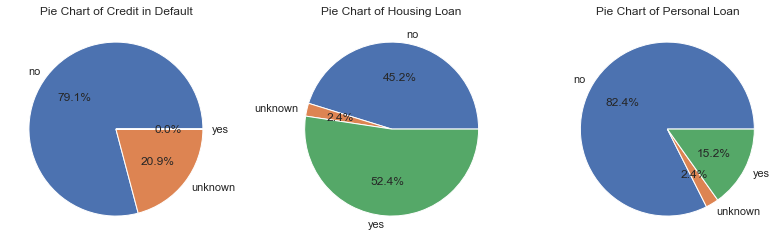

In [15]:
# Categorical variables
plt.figure(figsize=(14, 4))

# default
plt.subplot(1, 3, 1) 
create_pie(df, "default")
plt.title("Pie Chart of Credit in Default")
 
# housing
plt.subplot(1, 3, 2)
create_pie(df, "housing")
plt.title("Pie Chart of Housing Loan")

# loan
plt.subplot(1, 3, 3) 
create_pie(df, "loan")
plt.title("Pie Chart of Personal Loan")

From the pie charts above, we can tell that 79% of customers have no credit in default, 52.4% of customers have housing loan, and 15.2% of customers have personal loan.


<strong>Data related with the last contact of the current campaign:</strong>

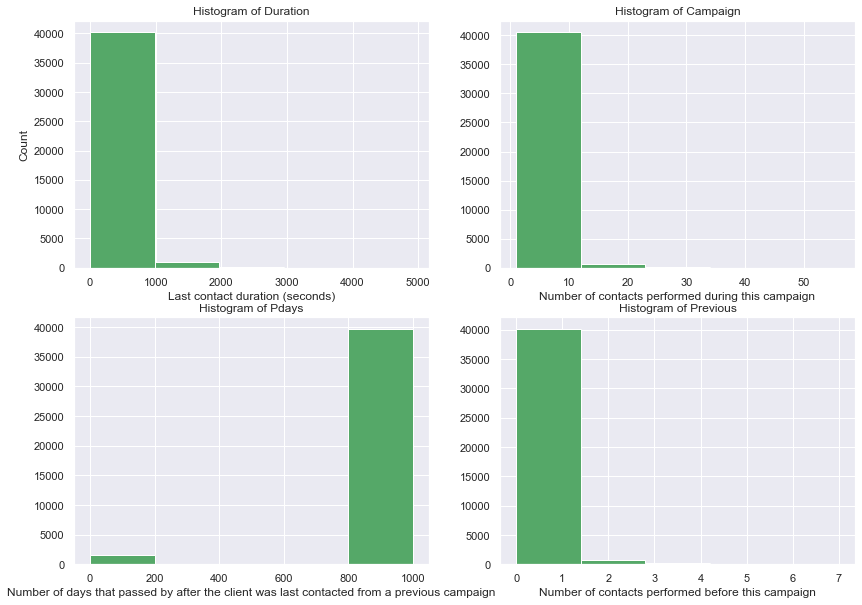

In [16]:
# Numerical variables
plt.figure(figsize=(14, 10))

# duration
plt.subplot(2, 2, 1)
plt.hist(df['duration'], bins=5, color="g")
plt.xlabel("Last contact duration (seconds)")
plt.ylabel("Count")
plt.title("Histogram of Duration")

# campaign
plt.subplot(2, 2, 2)
plt.hist(df['campaign'], bins=5, color="g")
plt.xlabel("Number of contacts performed during this campaign")
plt.title("Histogram of Campaign")

# pdays
plt.subplot(2, 2, 3)
plt.hist(df['pdays'], bins=5, color="g")
plt.xlabel("Number of days that passed by after the client was last contacted from a previous campaign")
plt.title("Histogram of Pdays")

# previous
plt.subplot(2, 2, 4)
plt.hist(df['previous'], bins=5, color="g")
plt.xlabel("Number of contacts performed before this campaign")
plt.title("Histogram of Previous")

plt.show()

From the charts above, we can tell that four variables seem to have outliers. Thus, we would like to explore in more detail.


In [17]:
# Summary number
df[['duration', 'campaign', 'pdays', 'previous']].describe()

,duration,campaign,pdays,previous
count,41188.000000,41188.000000,41188.000000,41188.000000
mean,258.285010,2.567593,962.475454,0.172963
std,259.279249,2.770014,186.910907,0.494901
min,0.000000,1.000000,0.000000,0.000000
25%,102.000000,1.000000,999.000000,0.000000
50%,180.000000,2.000000,999.000000,0.000000
75%,319.000000,3.000000,999.000000,0.000000
max,4918.000000,56.000000,999.000000,7.000000


In terms of "duration", since this attribute highly affects the output target (e.g., if duration=0 then y='no'), we decided to remove this column when building models to have a realistic predictive model.

In terms of "campaign", it ranges from 1 to 56 and the mean is 2.56. Since the outliers is nearly 6%, we decided to keep these values instead of deleting. Perhaps in the future, we can rescale the data using such as StandardScaler().

In [18]:
# campaign outliers
upper_outlier_percentage(df, "campaign")

campaign has 5.84% outliers.


Regarding "pdays", value 999 is recorded when a client was not previously contacted. Yet, since 96.32% of data is recorded as 999, we decided to discard this column when predicting.


In [19]:
# pdays = 999
pdays_999 = len(df[df['pdays'] == 999])
pdays_999_per = pdays_999 / len(df)
pdays_999_per = "{:.2%}".format(pdays_999_per)
print(f' pdays has {pdays_999_per} data recorded as 999.')

 pdays has 96.32% data recorded as 999.


Regarding "previous", it ranges from 0 to 7 and the mean is 0.173. Since the outliers is around 13.66%, we decided to keep these values. Perhaps in the future, we can separate them into another subset, building another model for those outliers.

In [20]:
# previous outliers
upper_outlier_percentage(df, "previous")

previous has 13.66% outliers.


Text(0.5, 1.0, 'Bar Chart of the Last Contact Day of the Week')

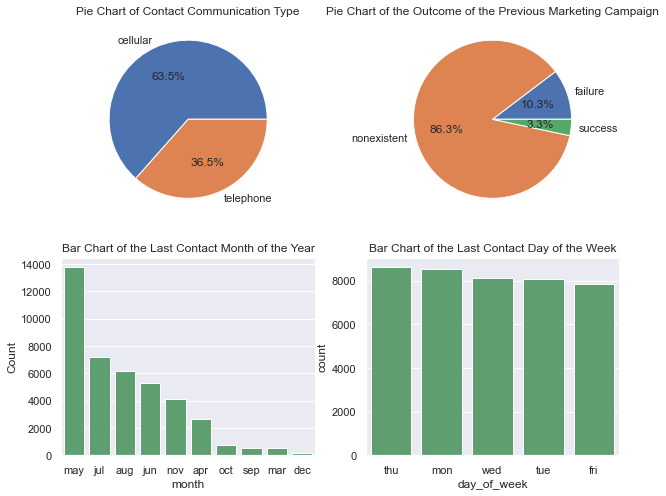

In [21]:
# Categorical variables
plt.figure(figsize=(10, 8))

# contact
plt.subplot(2, 2, 1) 
create_pie(df, "contact")
plt.title("Pie Chart of Contact Communication Type")

# poutcome
plt.subplot(2, 2, 2) 
create_pie(df, "poutcome")
plt.title("Pie Chart of the Outcome of the Previous Marketing Campaign")

# month
plt.subplot(2, 2, 3) 
sns.countplot(x="month", data=df, color="g", order = df['month'].value_counts().index)
plt.ylabel("Count")
plt.title('Bar Chart of the Last Contact Month of the Year')

# day_of_week
plt.subplot(2, 2, 4) 
sns.countplot(x="day_of_week", data=df, color="g", order = df['day_of_week'].value_counts().index)
plt.title('Bar Chart of the Last Contact Day of the Week')

From the pie charts above, we can tell that 63.5% of contact communication type are cellular, and for the outcome of the previous marketing campaign, failure is three times of success. That is, the success rate of previous marketing campaign is around 25%, which is better than this time, 11%. <br />
From the bar charts above, we can tell that most of "the last contact month of the year" is May and there is no "Jan" and "Feb". Also, it seems like the distribution of "the last contact day of the week" is equal.

<strong>Social and economic context attributes:</strong>

Text(0.5, 1.0, 'Boxplot of cons.conf.idx')

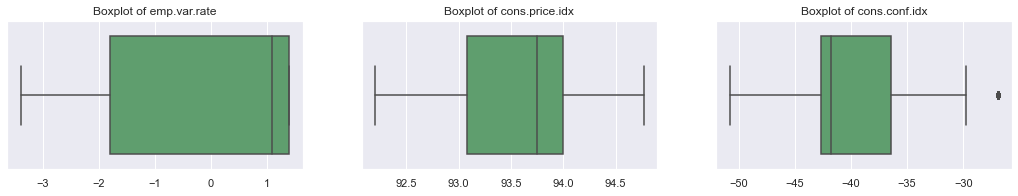

In [22]:
plt.figure(figsize=(18, 6))

# emp.var.rate
plt.subplot(2, 3, 1)
sns.boxplot(x=df['emp.var.rate'], color='g').set(xlabel=None)
plt.title("Boxplot of emp.var.rate")

# cons.price.idx
plt.subplot(2, 3, 2)
sns.boxplot(x=df['cons.price.idx'], color='g').set(xlabel=None)
plt.title("Boxplot of cons.price.idx")

# cons.conf.idx
plt.subplot(2, 3, 3)
sns.boxplot(x=df['cons.conf.idx'], color='g').set(xlabel=None)
plt.title("Boxplot of cons.conf.idx")

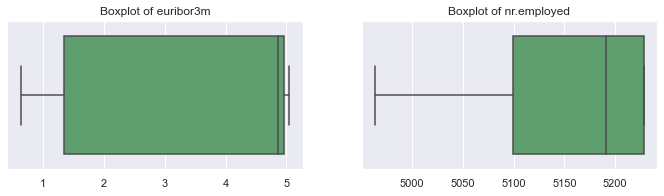

In [23]:
plt.figure(figsize=(18, 6))
# euribor3m
plt.subplot(2, 3, 4)
sns.boxplot(x=df['euribor3m'], color='g').set(xlabel=None)
plt.title("Boxplot of euribor3m")

# nr.employed
plt.subplot(2, 3, 5)
sns.boxplot(x=df['nr.employed'], color='g').set(xlabel=None)
plt.title("Boxplot of nr.employed")
plt.show()

From the boxplots above, we can tell that only "cons.conf.idx" has outliers. Below we explored in detail.


In [24]:
# cons.conf.idx summary number
df[['cons.conf.idx']].describe()

,cons.conf.idx
count,41188.000000
mean,-40.502600
std,4.628198
min,-50.800000
25%,-42.700000
50%,-41.800000
75%,-36.400000
max,-26.900000


In [25]:
# cons.conf.idx outliers
upper_outlier_percentage(df, "cons.conf.idx")

cons.conf.idx has 1.09% outliers.


We can tell that "cons.conf.idx" ranges from -50.8 to -26.9 and the outliers are around 1%. Thus, we decided to delete those outliers data directly.


### 3. Bi-variate Analysis

Text(0.5, 1.0, 'Boxplot of cons.conf.idx and y')

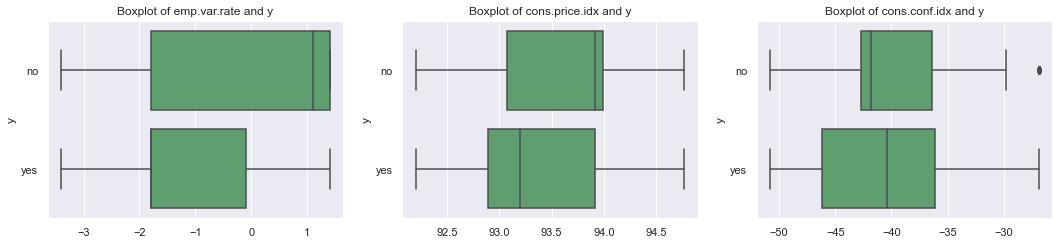

In [26]:
plt.figure(figsize=(18, 8))

plt.subplot(2, 3, 1)
sns.boxplot(x=df['emp.var.rate'],y=df['y'], color='g').set(xlabel=None)
plt.title("Boxplot of emp.var.rate and y")

plt.subplot(2, 3, 2)
sns.boxplot(x=df['cons.price.idx'],y=df['y'], color='g').set(xlabel=None)
plt.title("Boxplot of cons.price.idx and y")

plt.subplot(2, 3, 3)
sns.boxplot(x=df['cons.conf.idx'],y=df['y'], color='g').set(xlabel=None)
plt.title("Boxplot of cons.conf.idx and y")

In [27]:
df[['cons.price.idx']].describe()

,cons.price.idx
count,41188.000000
mean,93.575664
std,0.578840
min,92.201000
25%,93.075000
50%,93.749000
75%,93.994000
max,94.767000


<ol>
    <li>Boxplot of emp.var.rate and y</li>
    <ul>
        <li>We observed that the maximum consumer confidence index is greater than 1</li>
        <li>We can also say that 75% of employment variation rate is greater than 1 for the clients who said no for the term deposit and for the clients who said yes for the term deposit lie below 0 </li>
        <li>25% of employment variation rate lie in the negative side of the figure i.e. less than -1 for clients who said yes as well as no</li>
    </ul><br>
    <li>Boxplot of cons.price.idx and y</li>
    <ul>
        <li>We observed that the maximum consumer price index is greater than 94.5 for both the values of the target variable</li>
        <li>We can also say that 75% of consumer price index is equivalent to 94 for the clients who said no and less than 94 for the clients who said yes</li>
        <li>IQR of yes is larger than no</li>
    </ul><br>
    <li>Boxplot of cons.conf.idx and y</li>
    <ul>
        <li>The boxplot cons.conf.idx has outliers where the client has said no for the term deposit. The median lies between -45 and -40</li>
    </ul>
</ol>

Text(0.5, 1.0, 'Boxplot of age and y')

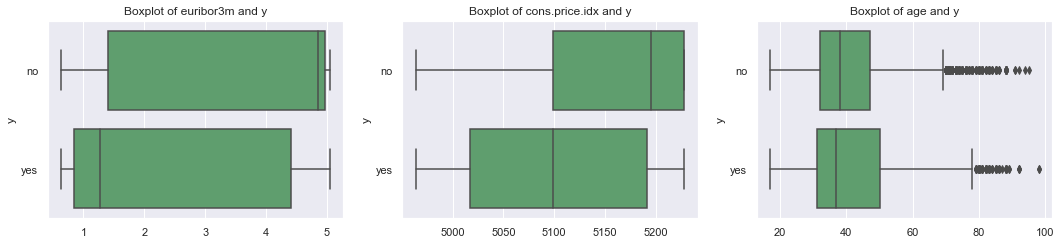

In [28]:
plt.figure(figsize=(18, 8))
plt.subplot(2, 3, 1)
sns.boxplot(x=df['euribor3m'],y=df['y'], color='g').set(xlabel=None)
plt.title("Boxplot of euribor3m and y")

plt.subplot(2, 3, 2)
sns.boxplot(x=df['nr.employed'],y=df['y'], color='g').set(xlabel=None)
plt.title("Boxplot of cons.price.idx and y")

plt.subplot(2, 3, 3)
sns.boxplot(x=df['age'],y=df['y'], color='g').set(xlabel=None)
plt.title("Boxplot of age and y")

From these 3 boxplots we can tell the only figure consisting of outliers is the boxplot of age and y (target variable). From the boxplot of age and y, we can tell that the median age of "yes" is smaller than the median age of "no". Yet, the age IQR of "yes" is greater than the age IQR of "no".

<AxesSubplot:xlabel='age', ylabel='campaign'>

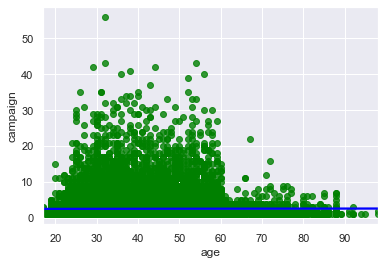

In [29]:
# Scatterplot Creation
# For age and campaign
sns.regplot(x="age", y="campaign", data=df,
           scatter_kws={"color": "green"}, line_kws={"color": "blue"})

<ul>
<li>We created this plot to find the relation between two variables age and campaign. We need to find out what age group were normally contacted in this campaign.</li>
<li>There is a negative correlation between age and campaign variables. As age increases number of contacts performed during this campaign and for this client decreases.</li>
<li>As we can see clusters are formed between age 20 and 60. It means that majority of clients between that age group were contacted the most during the campaign</li>
</ul>

<AxesSubplot:xlabel='campaign', ylabel='duration'>

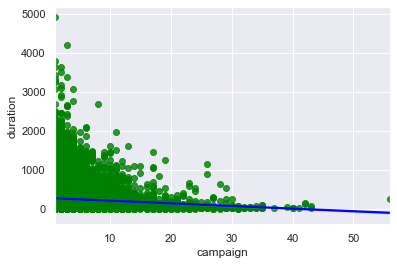

In [30]:
# For campaign and duration
sns.regplot(x="campaign", y="duration", data=df,
           scatter_kws={"color": "green"}, line_kws={"color": "blue"})

<AxesSubplot:xlabel='age', ylabel='duration'>

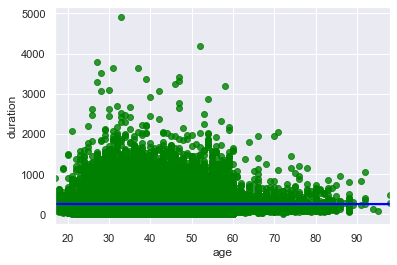

In [31]:
sns.regplot(x="age", y="duration", data=df,
           scatter_kws={"color": "green"}, line_kws={"color": "blue"})

<ul>
<li>After conducting the campaign we looked out for the people who were contacted during the campaign and when was its last contact duration after a call was performed</li>
<li>There is a negative correlation between campaign and duration. As number of campaign increases duration decreases.</li>
<li>As we can observe from the following scatter plot. The number of campaigns were conducted in huge numbers, but the clients were either contacted or not contacted i.e. if duration = 0 then we can say that they were not contacted at all or calls were not answered. There's a huge cluster formed near 0 value which means that majority of people were not contacted at all  </li>
</ul>

<AxesSubplot:xlabel='marital', ylabel='count'>

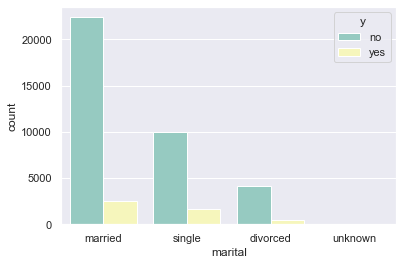

In [32]:
sns.countplot(x='marital',hue='y',data=df, palette="Set3")

From this figure we can see that the number of calls being made for term deposit to people according to their marital status. Number of people called lie in these categories:
<ul>
    <li>Married</li>
    <li>Single</li>
    <li>Divorced</li>
    <li>Unknown</li>
</ul>
As we can see the maximum number of people who were contacted lie in the married category out of which maximum people said No for the term deposit and very few have said Yes.

<AxesSubplot:xlabel='month', ylabel='count'>

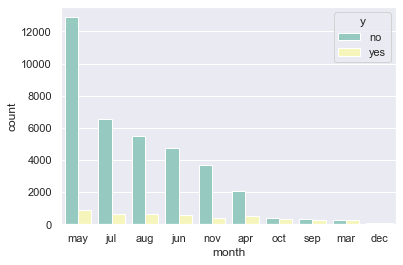

In [33]:
sns.countplot(x='month',hue='y',data=df, order = df['month'].value_counts().index, palette="Set3")

Number of clients contacted every month. As we can see the number of clients previously contacted over the months were maximum in the month of May and also we can observe since there were maximum number of calls in the month of May, maximum clients said no for the term deposit and not many clients said yes for the term deposit

<AxesSubplot:xlabel='contact', ylabel='count'>

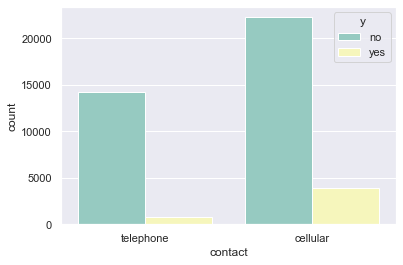

In [34]:
sns.countplot(x='contact',hue='y',data=df, palette="Set3")

Number of clients were contacted through two types of communication method:
<ul>
    <li>Telephone</li>
    <li>Cellular</li>
</ul>
Maximum number of clients were contacted through cellular type of communication and maximum number of clients said No for the term deposit.

<center><h1>Data Cleaning and Preprocessing</h1></center>

### 1. Outlier Treatment
In previously univariate analysis, we decided to delete outliers of "age" and "cons.conf.idx".

In [35]:
cleaned_df = delete_upper_outliers(df, "age")
cleaned_df = delete_upper_outliers(cleaned_df, "cons.conf.idx")
cleaned_df.shape

(40327, 21)

### 2. Delete Features
Columns "pdays" and "duration" have to be removed.

In [36]:
cleaned_df = cleaned_df.drop(['pdays', 'duration'], axis=1)
cleaned_df.shape

(40327, 19)

### 3. Convert Data Type
Change columns with 'yes' and 'no' values to boolean columns.

In [37]:
cleaned_df['y'] = [0 if i == "no" else 1 for i in cleaned_df['y']]

# Check
cleaned_df['y'].value_counts()

0    36068
1     4259
Name: y, dtype: int64

### 4. Separate X and y variabels

In [38]:
X = cleaned_df.drop(columns = 'y')
y = cleaned_df[['y']]
y = y.values.ravel()

### 5. Split Training and Test

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=2021)

### 6. Dummy Variables & One Hot Encoding for X

1.For logistic regression, we converted categorical independent variables into dummy variables to avoid the dummy variable trap.

In [40]:
cate_col = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

X_lr_train = X_train
X_lr_train = cat_to_dummy(cate_col, X_lr_train)
X_lr_test = X_test
X_lr_test = cat_to_dummy(cate_col, X_lr_test)

2.For models other than logistic regression, we used one-hot encoding.

In [41]:
X_train = cat_to_one_hot(cate_col, X_train)
X_test = cat_to_one_hot(cate_col, X_test)

### 7. Balanced Training Dataset

Since our dataset is imbalanced, which has 25239 '0' and 2989 '1', we used SMOTE function to oversample a minority class.

In [42]:
table_of_target_var(y_train)
print("Total observations in the training dataset:",len(y_train))

[[    0 25239]
 [    1  2989]]
Total observations in the training dataset: 28228


In [43]:
SMOTE = SMOTE(random_state=2021)

X_lr_train, y_lr_train = SMOTE.fit_resample(X_lr_train, y_train)
X_train, y_train = SMOTE.fit_resample(X_train, y_train)

After oversampling, we have 25239 '0' and 25239 '1' in the training datasets.

In [44]:
table_of_target_var(y_train)
print("After oversampling, total observations in the training dataset: ",len(y_train))

[[    0 25239]
 [    1 25239]]
After oversampling, total observations in the training dataset:  50478


### 8. Feature Scaling (for KNN)
To scale data in KNN, we used StandardScaler function.

In [45]:
# Standardizes X for KNN mdoel
scaler = StandardScaler()
scaler.fit(X_train)
X_knn_train = scaler.transform(X_train)
scaler.fit(X_test)
X_knn_test = scaler.transform(X_test)

<center><h1>Data Modeling</h1></center>

### 1. Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(max_iter=10000)
LR.fit(X_lr_train, y_lr_train)

LogisticRegression(max_iter=10000)

### 2. KNN
#### - Find Optimal Hyperparameters

In [47]:
# Tuning Models with GridSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn import neighbors
knn = neighbors.KNeighborsClassifier()

params = {"n_neighbors": np.arange(5,10), "metric": ["euclidean", "cityblock"]}
grid_knn = GridSearchCV(estimator=knn, param_grid=params)
grid_knn.fit(X_knn_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'cityblock'],
                         'n_neighbors': array([5, 6, 7, 8, 9])})

In [48]:
# Print Optimal KNN
print(grid_knn.best_score_)
print(grid_knn.best_estimator_.n_neighbors)
print(grid_knn.best_estimator_.metric)

0.926780992614536
6
cityblock


#### - Use Optimal Hyperparameters

In [49]:
KNN = neighbors.KNeighborsClassifier(n_neighbors=6, metric='cityblock')
KNN.fit(X_knn_train, y_train)

KNeighborsClassifier(metric='cityblock', n_neighbors=6)

### 3. Decision Tree
#### - Find Optimal Hyperparameters

In [50]:
# Tuning Models with GridSearchCV

from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()

params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : list(range(5, 10)),
}

grid_dt = GridSearchCV(DT, param_grid=params)
grid_dt.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9]})

In [51]:
# Print Optimal DT
print(grid_dt.best_score_)
print(grid_dt.best_params_)
print(grid_dt.best_estimator_)

0.8608314828463982
{'criterion': 'gini', 'max_depth': 9}
DecisionTreeClassifier(max_depth=9)


#### - Use Optimal Hyperparameters

In [52]:
DT = DecisionTreeClassifier(criterion='gini', max_depth=9)
DT.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9)

### 4. Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train, y_train)

RandomForestClassifier()

### 5. Gradient Boosting

In [54]:
from sklearn.ensemble import GradientBoostingClassifier
GB = GradientBoostingClassifier()
GB.fit(X_train, y_train)

GradientBoostingClassifier()

<center><h1>Predicting on Test Data</h1></center>

In [55]:
LR_pred=LR.predict(X_lr_test)
KNN_pred = KNN.predict(X_knn_test)
DT_pred = DT.predict(X_test)
RF_pred = RF.predict(X_test)
GB_pred = GB.predict(X_test)

<center><h1>Evaluate Modles using Metrics</h1></center>

### 1. Classification Report

In [56]:
from sklearn.metrics import accuracy_score, classification_report

print('Logistic Regression Report:')
print(classification_report(y_test, LR_pred))

print('KNN Report:')
print(classification_report(y_test, KNN_pred))

print('Decision Tree Report:')
print(classification_report(y_test, DT_pred))

print('Random Forest Report:')
print(classification_report(y_test, RF_pred))

print('Gradient Boosting Report:')
print(classification_report(y_test, GB_pred))

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.93      0.89      0.91     10829
           1       0.30      0.41      0.35      1270

    accuracy                           0.84     12099
   macro avg       0.61      0.65      0.63     12099
weighted avg       0.86      0.84      0.85     12099

KNN Report:
              precision    recall  f1-score   support

           0       0.94      0.88      0.91     10829
           1       0.32      0.49      0.39      1270

    accuracy                           0.84     12099
   macro avg       0.63      0.68      0.65     12099
weighted avg       0.87      0.84      0.85     12099

Decision Tree Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94     10829
           1       0.48      0.41      0.44      1270

    accuracy                           0.89     12099
   macro avg       0.70      0.68      0.69     12099
weighted avg

In fact, we have tried to use imbalanced training dataset to build models before. However, although the overall accuaracy can high to 90%, the recall (TPR) of '1' is low to 20%. Now we can see that by using balanced dataset, in the KNN, the TPR of '1' increased to 49% and the overall accuracy is still pretty high, around 84%. Among five models, decision tree, Random Forest,  and Gradient Boosting have the highest accuaracy, nearly 90%.

### 2. ROC Curve

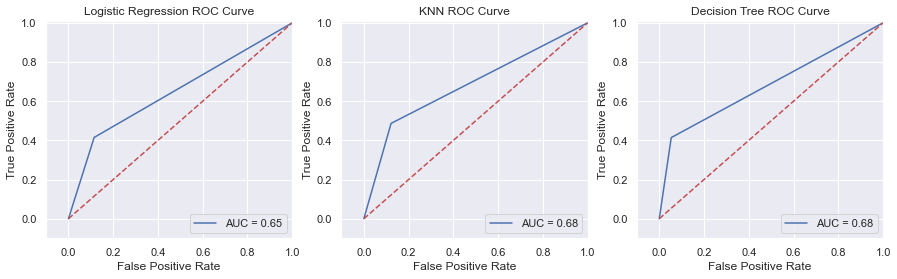

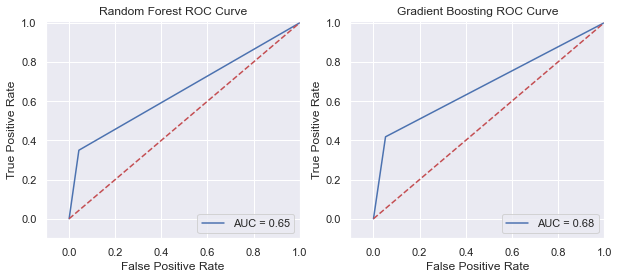

In [57]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
ROC_curve(y_test, LR_pred)
plt.title("Logistic Regression ROC Curve")
            
plt.subplot(1, 3, 2)
ROC_curve(y_test, KNN_pred)
plt.title("KNN ROC Curve")

plt.subplot(1, 3, 3)
ROC_curve(y_test, DT_pred)
plt.title("Decision Tree ROC Curve")
plt.show()

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
ROC_curve(y_test, RF_pred)
plt.title("Random Forest ROC Curve")

plt.subplot(1, 2, 2)
ROC_curve(y_test, GB_pred)
plt.title("Gradient Boosting ROC Curve")
plt.show()

From the charts above, we can tell that KNN, Decision Tree, and Gradient Boosting have higher AUC than Logistic Rrgression and Random Forest.

### 3. Features Importances

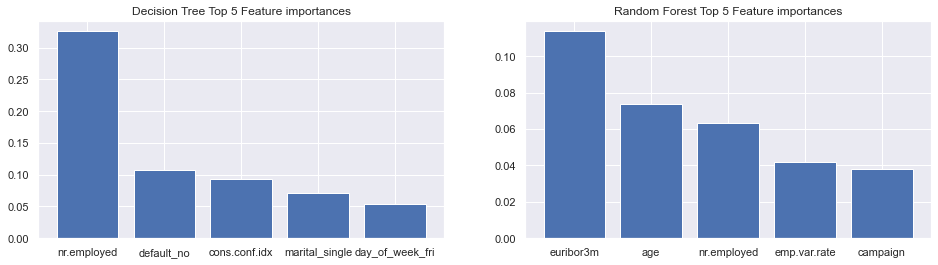

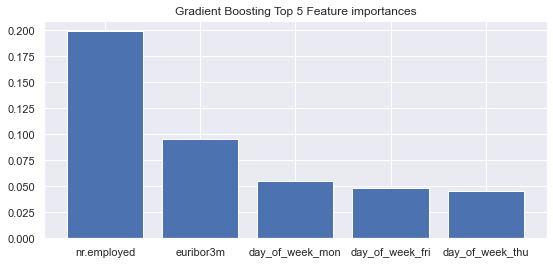

In [58]:
plt.figure(figsize=(16, 4))

plt.subplot(1, 2, 1)
plot_top5_feature_importances(X_train, DT.feature_importances_)
plt.title('Decision Tree Top 5 Feature importances')

plt.subplot(1, 2, 2)
plot_top5_feature_importances(X_train, RF.feature_importances_)
plt.title('Random Forest Top 5 Feature importances')
plt.show()

plt.figure(figsize=(9, 4))

plot_top5_feature_importances(X_train, GB.feature_importances_)
plt.title('Gradient Boosting Top 5 Feature importances')
plt.show()

From the Top 5 Feature importances plots above, we can tell that based on these three models, variables such as nr.employed (number of employees), euribor3m (euribor 3 month rate), and day_of_week (last contact day of the week) are significant when prediciting campaign outcome.